In [2]:
# import requirement modules and packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [2]:
# read csv thanhhoa.csv 
data = pd.read_csv("thanhhoa.csv",index_col=0)
data.drop(index=0,inplace=True)
data.describe()

,SBD,Toán,Văn,Ngoại ngữ,Sinh,Lí,Hóa,Sử,Địa,GDCD
count,3.233500e+04,32335.000000,32335.000000,32335.000000,9281.000000,9281.000000,9281.000000,23054.000000,23054.000000,23054.000000
mean,2.801952e+07,6.442740,8.167292,5.039456,6.351552,6.856589,6.868252,6.786588,7.486749,8.314696
std,1.117381e+04,1.621882,0.880616,1.810818,1.248228,1.761469,1.791528,1.475602,1.282307,1.076502
min,2.800000e+07,0.600000,2.000000,0.800000,1.750000,1.000000,1.250000,1.750000,1.250000,2.250000
25%,2.800971e+07,5.400000,7.750000,3.800000,5.500000,5.500000,5.500000,5.750000,6.750000,7.750000
50%,2.801972e+07,6.600000,8.250000,4.600000,6.250000,7.250000,7.250000,6.750000,7.500000,8.500000
75%,2.802924e+07,7.800000,8.750000,6.200000,7.250000,8.250000,8.250000,7.750000,8.500000,9.000000
max,2.803877e+07,9.800000,9.750000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [3]:
# phân tích tổng quát 

for sub in data[0:]:
    print(f" {sub} cao nhất :{data[sub].max()}")
# Hiển thị số lượng điểm 10 các môn học 

# trước hết là môn toán 
print("\n\n")
print(f"Số điểm toán trên 9: {(data['Toán']>9).sum()}")
print(f"Điểm toán trung bình :{(data['Toán']).mean()}")


    

 SBD cao nhất :28038769
 Toán cao nhất :9.8
 Văn cao nhất :9.75
 Ngoại ngữ cao nhất :10.0
 Sinh cao nhất :10.0
 Lí cao nhất :10.0
 Hóa cao nhất :10.0
 Sử cao nhất :10.0
 Địa cao nhất :10.0
 GDCD cao nhất :10.0



Số điểm toán trên 9: 251
Điểm toán trung bình :6.442740064945106


In [4]:
data.head()

,SBD,Toán,Văn,Ngoại ngữ,Sinh,Lí,Hóa,Sử,Địa,GDCD
1,28000002,6.6,8.50,8.2,NaN,NaN,NaN,9.50,8.75,9.5
2,28000003,6.8,7.00,5.0,4.75,5.25,6.75,NaN,NaN,NaN
3,28000004,8.2,8.50,8.0,NaN,NaN,NaN,7.50,8.75,8.5
4,28000005,7.8,9.00,7.8,NaN,NaN,NaN,6.75,7.25,8.5
5,28000006,8.0,6.75,5.0,4.75,8.25,8.00,NaN,NaN,NaN


In [4]:
# add sumA,sumB,sumC,sumD
data['sumA'] = data[['Toán','Lí','Hóa']].sum(axis=1)
data['sumB'] = data[['Toán','Sinh','Hóa']].sum(axis=1)
data['sumC'] = data[['Văn','Sử','Địa']].sum(axis=1)
data['sumD'] = data[['Toán','Văn','Ngoại ngữ']].sum(axis=1)
data.head()


,SBD,Toán,Văn,Ngoại ngữ,Sinh,Lí,Hóa,Sử,Địa,GDCD,sumA,sumB,sumC,sumD
1,28000002,6.6,8.50,8.2,NaN,NaN,NaN,9.50,8.75,9.5,6.60,6.60,26.75,23.30
2,28000003,6.8,7.00,5.0,4.75,5.25,6.75,NaN,NaN,NaN,18.80,18.30,7.00,18.80
3,28000004,8.2,8.50,8.0,NaN,NaN,NaN,7.50,8.75,8.5,8.20,8.20,24.75,24.70
4,28000005,7.8,9.00,7.8,NaN,NaN,NaN,6.75,7.25,8.5,7.80,7.80,23.00,24.60
5,28000006,8.0,6.75,5.0,4.75,8.25,8.00,NaN,NaN,NaN,24.25,20.75,6.75,19.75


In [5]:
# read data và lọc thanh hóa  từ file data cả nước 
load = pd.read_csv("data/full2023.csv",sep=',')
load.head(10)
old_data = load[['sbd','toan','ngu_van','ngoai_ngu','sinh_hoc','lich_su','dia_li','gdcd','hoa_hoc','vat_li']]
old_data.rename(columns={'sbd':'SBD','toan':'Toán','ngu_van':'Văn','ngoai_ngu':'Ngoại ngữ','sinh_hoc':'Sinh','lich_su':'Sử','dia_li':'Địa','gdcd':'GDCD','hoa_hoc':'Hóa','vat_li':'Lí'},inplace=True)

old_data['sumD'] = old_data[['Toán','Văn','Ngoại ngữ']].sum(axis=1)
old_data['sumC'] = old_data[['Văn','Sử','Địa']].sum(axis=1)
old_data['sumB'] = old_data[['Sinh','Lí','Hóa']].sum(axis=1)
old_data['sumA'] = old_data[['Toán','Lí','Hóa']].sum(axis=1)


old_data.describe()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9932\494112802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_data.rename(columns={'sbd':'SBD','toan':'Toán','ngu_van':'Văn','ngoai_ngu':'Ngoại ngữ','sinh_hoc':'Sinh','lich_su':'Sử','dia_li':'Địa','gdcd':'GDCD','hoa_hoc':'Hóa','vat_li':'Lí'},inplace=True)


,SBD,Toán,Văn,Ngoại ngữ,Sinh,Sử,Địa,GDCD,Hóa,Lí,sumD,sumC,sumB,sumA
count,1.022060e+06,1.003373e+06,1.008239e+06,880997.000000,324625.000000,683447.000000,682134.000000,565452.000000,328118.000000,327189.000000,1.022060e+06,1.022060e+06,1.022060e+06,1.022060e+06
mean,2.753863e+07,6.250557e+00,6.858194e+00,5.462410,6.394933,6.025629,6.147523,8.285805,6.744646,6.573900,1.761022e+01,1.489769e+01,6.300905e+00,1.040603e+01
std,1.915578e+07,1.633336e+00,1.326471e+00,1.966353,1.206772,1.552931,1.168732,1.137638,1.428468,1.486819,4.930851e+00,6.481255e+00,9.321226e+00,7.474496e+00
min,1.000001e+06,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000129e+07,5.200000e+00,6.000000e+00,4.000000,5.500000,5.000000,5.500000,7.750000,5.750000,5.500000,1.450000e+01,7.750000e+00,0.000000e+00,5.200000e+00
50%,2.801558e+07,6.600000e+00,7.000000e+00,5.200000,6.500000,6.000000,6.250000,8.500000,7.000000,6.750000,1.820000e+01,1.675000e+01,0.000000e+00,6.800000e+00
75%,4.400621e+07,7.600000e+00,7.750000e+00,7.000000,7.250000,7.250000,7.000000,9.250000,7.750000,7.750000,2.130000e+01,2.000000e+01,1.725000e+01,1.850000e+01
max,6.400694e+07,1.000000e+01,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.890000e+01,2.950000e+01,2.900000e+01,2.935000e+01


In [17]:
#lọc data thanh hóa 
# get loc 
# print(old_data.loc[old_data['SBD']==28000001])
# print(old_data.loc[old_data['SBD']==29000001])

thanhhoa_2023 = old_data.iloc[495450:531930]
thanhhoa_2023

thanhhoa_2023['sumA'] = thanhhoa_2023[['Toán','Lí','Hóa']].sum(axis=1)
thanhhoa_2023['sumB'] = thanhhoa_2023[['Toán','Hóa','Sinh']].sum(axis=1)
thanhhoa_2023['sumC'] = thanhhoa_2023[['Văn','Sử','Địa']].sum(axis=1)
thanhhoa_2023['sumD'] = thanhhoa_2023[['Toán','Văn','Ngoại ngữ']].sum(axis=1)


# print(data['sumA'].shape)
# print(thanhhoa_2023['sumA'].shape)
# plt.figure(figsize=(16,8))
# plt.title("So sánh tương quan điểm khối A giữa 2023 và 2024 của tỉnh Thanh Hóa")
# plt.hist([data['sumA'],thanhhoa_2023['sumA']],color=["red","blue"],label=("năm 2023","Năm 2024"),bins=30,alpha=1)
# plt.yticks([500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
# plt.legend()
# plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18864\438783989.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thanhhoa_2023['sumA'] = thanhhoa_2023[['Toán','Lí','Hóa']].sum(axis=1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18864\438783989.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thanhhoa_2023['sumB'] = thanhhoa_2023[['Toán','Hóa','Sinh']].sum(axis=1)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18864\438783989.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [24]:
thanhhoa_2023.to_csv("data/thanhhoa_2023.csv")
thanhhoa_2023.keys()

Index(['SBD', 'Toán', 'Văn', 'Ngoại ngữ', 'Sinh', 'Sử', 'Địa', 'GDCD', 'Hóa',
       'Lí', 'sumD', 'sumC', 'sumB', 'sumA'],
      dtype='object')

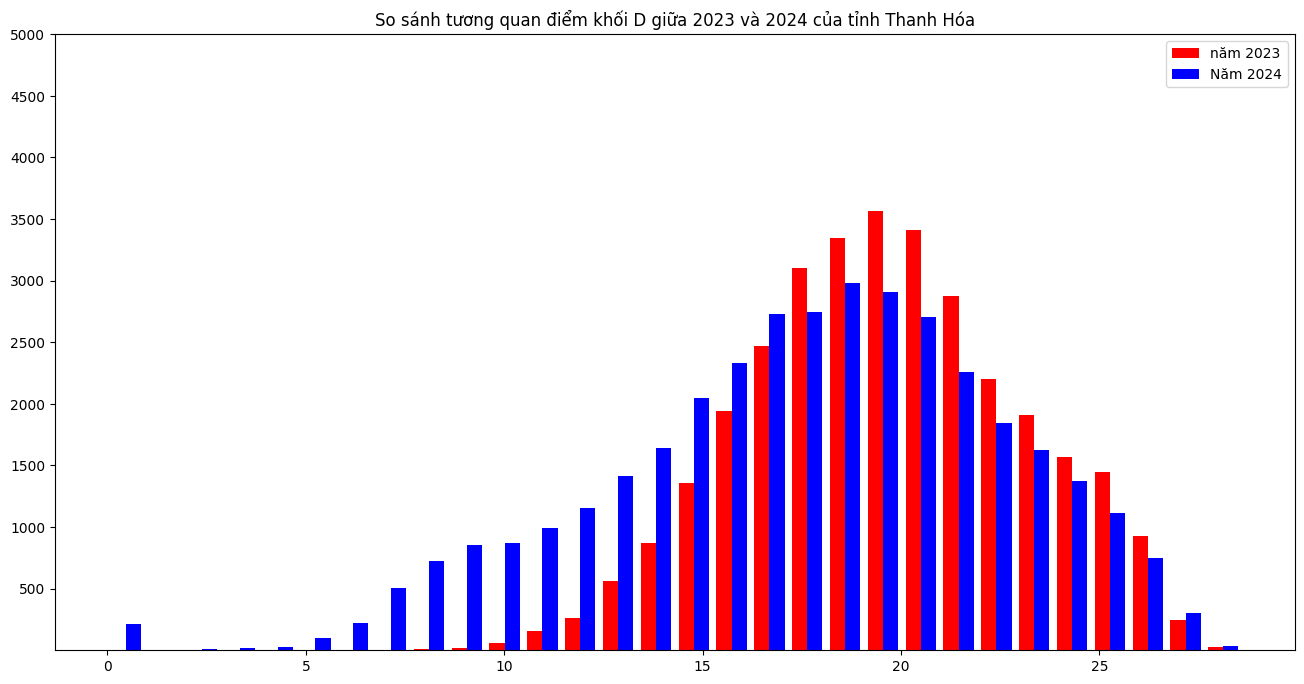

In [8]:
# visualize diem khoi A 
plt.figure(figsize=(16,8))
plt.title("So sánh tương quan điểm khối D giữa 2023 và 2024 của tỉnh Thanh Hóa")
plt.hist([data['sumD'],thanhhoa_2023['sumD']],color=["red","blue"],label=("năm 2023","Năm 2024"),bins=30,alpha=1)
plt.yticks([500,1000,1500,2000,2500,3000,3500,4000,4500,5000])

# for i in range(len(n)):
#     for j in range(len(n[i])):
#         plt.text(bins[j], n[i][j], str(int(n[i][j])), ha='center', va='bottom')


plt.legend()
plt.show()



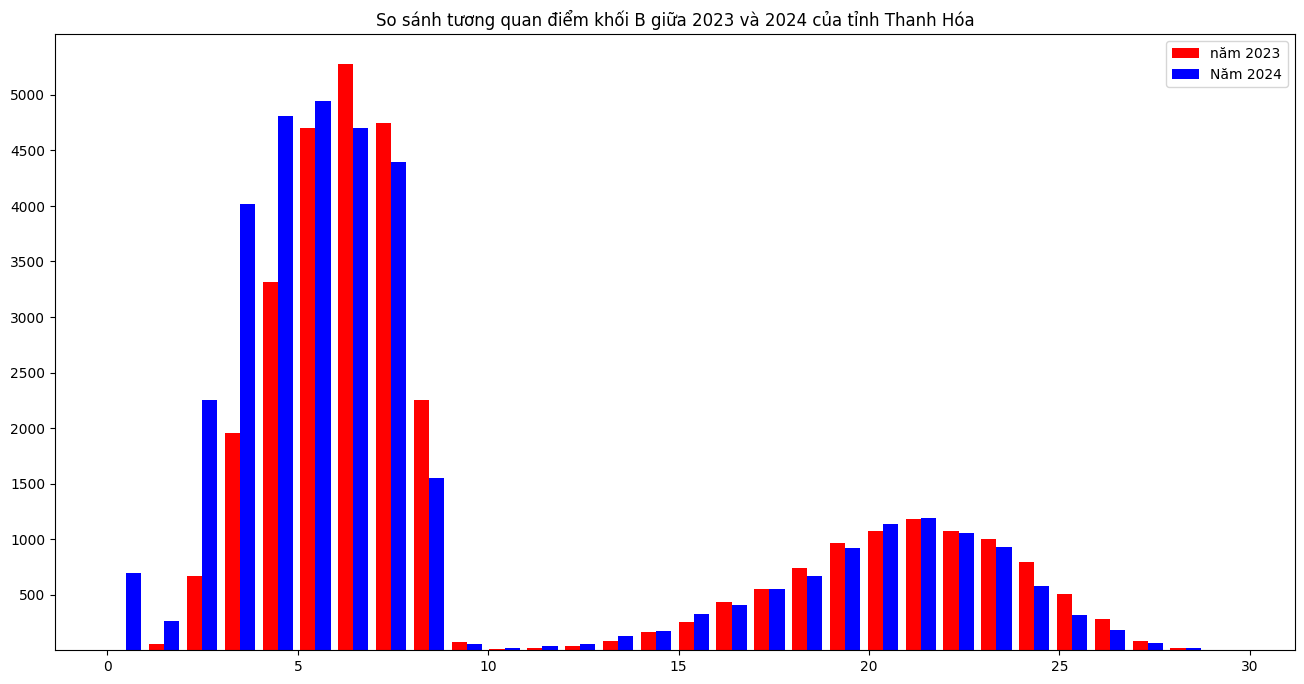

In [9]:
plt.figure(figsize=(16,8))
plt.title("So sánh tương quan điểm khối B giữa 2023 và 2024 của tỉnh Thanh Hóa")
plt.hist([data['sumB'],thanhhoa_2023['sumB']],color=["red","blue"],label=("năm 2023","Năm 2024"),bins=30,alpha=1)
plt.yticks([500,1000,1500,2000,2500,3000,3500,4000,4500,5000])

# for i in range(len(n)):
#     for j in range(len(n[i])):
#         plt.text(bins[j], n[i][j], str(int(n[i][j])), ha='center', va='bottom')


plt.legend()
plt.show()


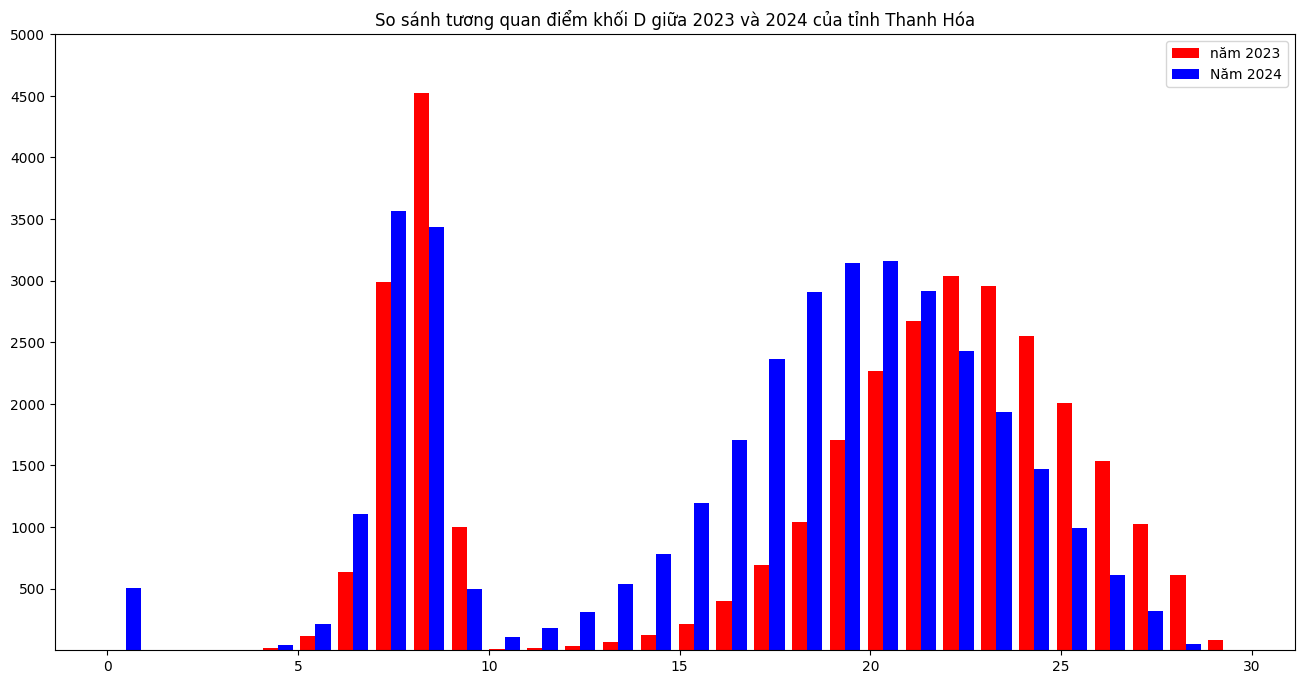

In [10]:
plt.figure(figsize=(16,8))
plt.title("So sánh tương quan điểm khối D giữa 2023 và 2024 của tỉnh Thanh Hóa")
plt.hist([data['sumC'],thanhhoa_2023['sumC']],color=["red","blue"],label=("năm 2023","Năm 2024"),bins=30,alpha=1)
plt.yticks([500,1000,1500,2000,2500,3000,3500,4000,4500,5000])

# for i in range(len(n)):
#     for j in range(len(n[i])):
#         plt.text(bins[j], n[i][j], str(int(n[i][j])), ha='center', va='bottom')


plt.legend()
plt.show()


In [50]:
print((data['Toán'] == 0.6).sum())
print((data['Toán'] == 8).sum())
print((data['Toán'] == 7.8).sum())




1
1702
1678


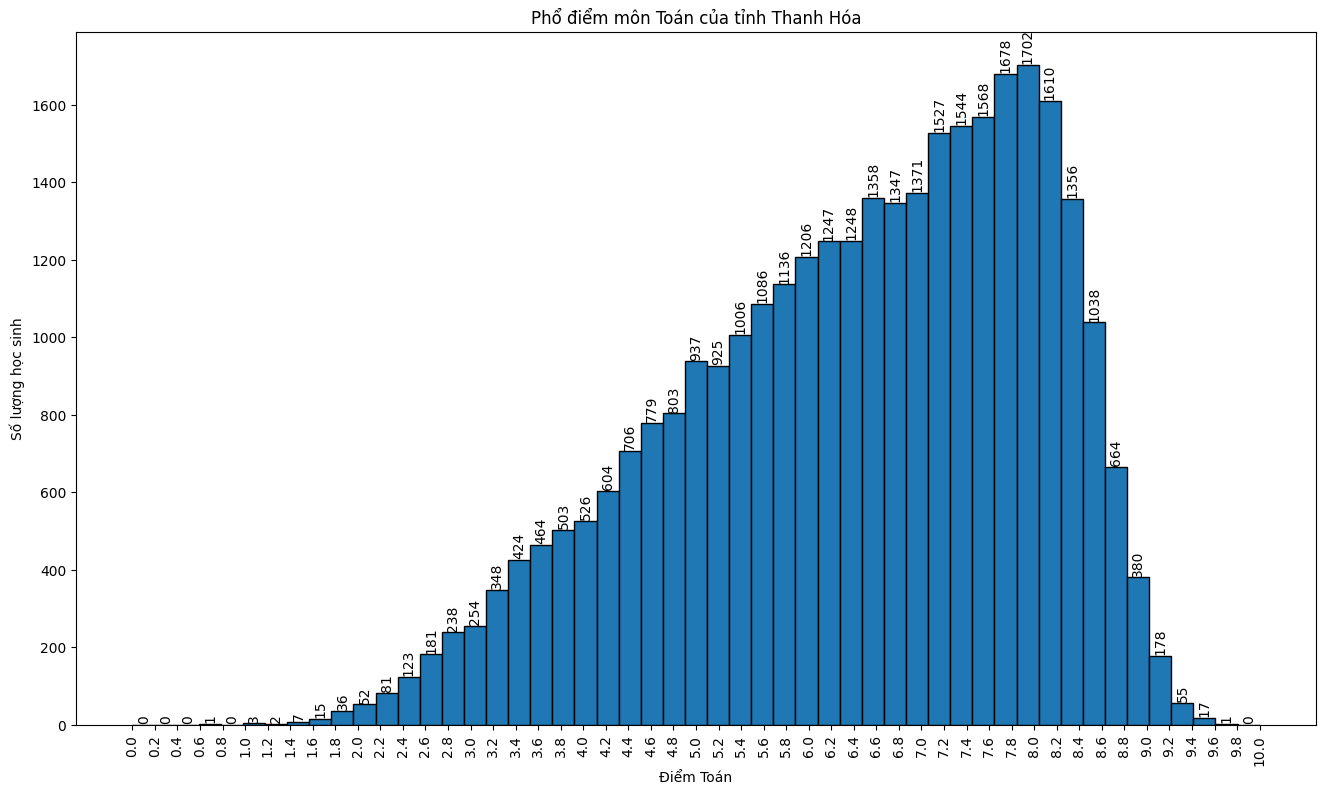

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu

# Lọc các giá trị không nằm trong khoảng từ 0 đến 10
data = data[(data['Toán'] >= 0) & (data['Toán'] <= 10)]

# Tạo một mảng chứa các giá trị từ 0 đến 10 với khoảng cách 0.2 (để có 51 bins)
dummy_values = np.linspace(0, 10, 51)
dummy_df = pd.DataFrame(dummy_values, columns=['Toán'])

data_combined = pd.concat([data, dummy_df], ignore_index=True)

plt.figure(figsize=(16,9))
counts, bins, patches = plt.hist(data_combined['Toán'],bins=51, edgecolor='black')

plt.grid(False)
plt.title("Phổ điểm môn Toán của tỉnh Thanh Hóa")
plt.xlabel("Điểm Toán")
plt.ylabel("Số lượng học sinh")

plt.xticks(np.linspace(0, 10, 51), rotation=90)

for count, bin in zip(counts, bins):
    plt.text(bin + 0.1, count+3, int(count-1), ha='center', va='bottom', rotation=90)

plt.show()


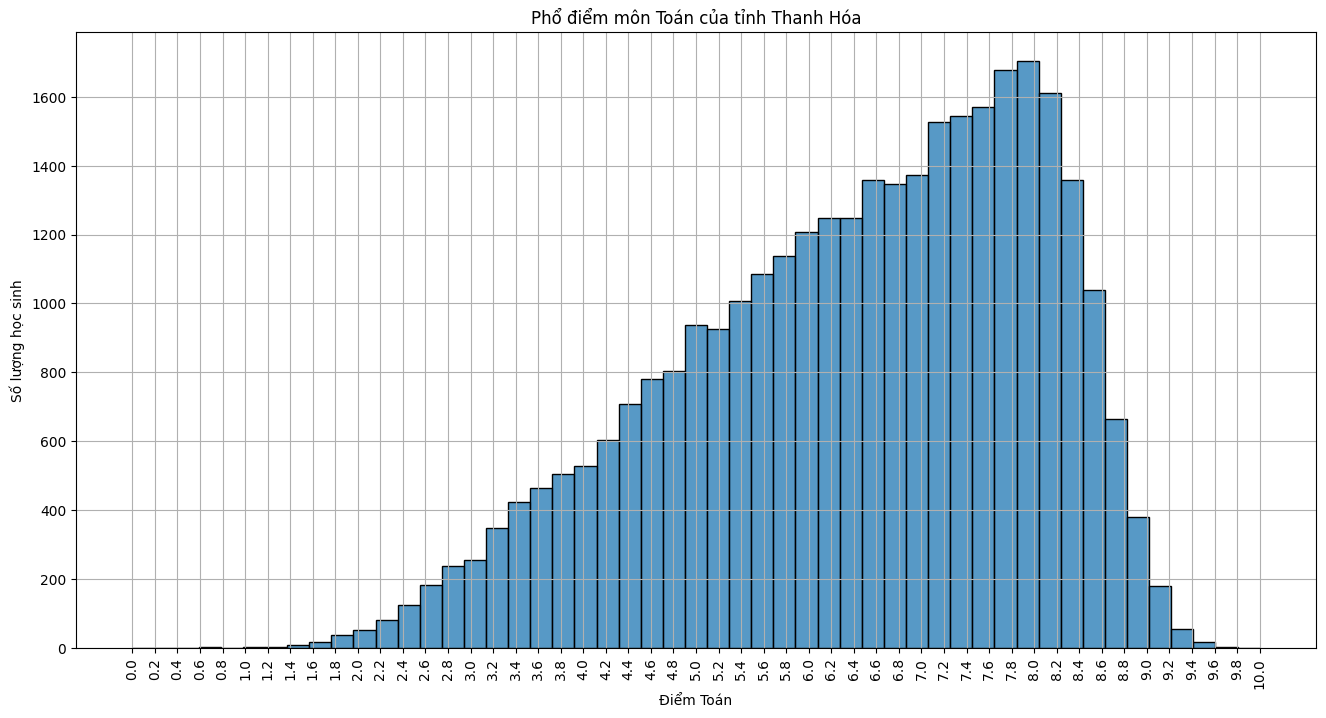

In [8]:
dummy_values = np.linspace(0, 10, 51)
dummy_df = pd.DataFrame(dummy_values, columns=['Toán'])

data_combined = pd.concat([data, dummy_df], ignore_index=True)
plt.figure(figsize=(16, 8))
sns.histplot(x=data_combined['Toán'], bins=51)
plt.grid(True)
plt.xticks(np.linspace(0,10,51),rotation=90)
plt.title("Phổ điểm môn Toán của tỉnh Thanh Hóa")
plt.xlabel("Điểm Toán")
plt.ylabel("Số lượng học sinh")

plt.show()